# Анализ эффективности работы отдела продаж

## 1. Оцените эффективность отдельных владельцев сделок и рекламных кампаний с точки зрения количества обработанных сделок, коэффициента конверсии и общей суммы продаж.

In [1]:
import pandas as pd

deals_df = pd.read_pickle("deals_cleaned_v3.pkl")

In [2]:
# add a flag for the success of the transaction is_success
deals_df['is_success'] = deals_df['Stage'] == 'Payment Done'

In [8]:
# create a summary table by owners, total number of transactions, number of successful transactions, conversion and sales amount
owners_effect = deals_df.groupby('Deal Owner Name').agg(
    total_deals=('Id', 'count'),
    success_deals=('is_success', 'sum'),
    conversion_rate=('is_success', lambda x: round(x.sum() / x.count(), 2)),
    total_paid=('Offer Total Amount', 'sum')
).reset_index().sort_values(by='total_paid', ascending=False)

In [18]:
owners_effect

,Deal Owner Name,total_deals,success_deals,conversion_rate,total_paid
21,Ulysses Adams,2150,141,0.07,5106800.0
5,Charlie Davis,2929,148,0.05,3822500.0
12,Julia Nelson,2196,93,0.04,3575311.0
17,Paula Underwood,1855,93,0.05,2842000.0
22,Victor Barnes,1229,44,0.04,2196800.0
2,Ben Hall,1344,46,0.03,2030800.0
15,Nina Scott,1280,46,0.04,1951400.0
18,Quincy Vincent,1878,65,0.03,1788900.0
16,Oliver Taylor,163,50,0.31,1660500.0
10,Jane Smith,981,31,0.03,1468500.0


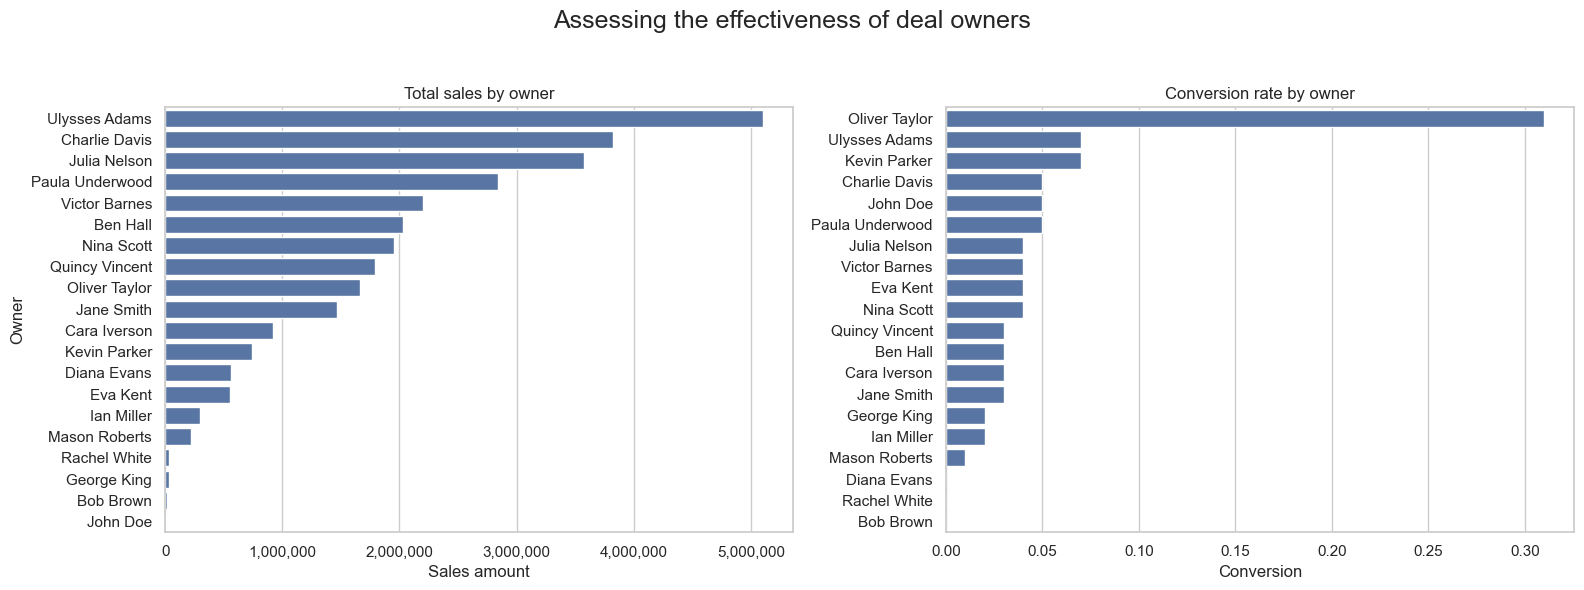

In [17]:
# Visualization of the efficiency of deal owners in terms of sales amounts and conversions
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out owners of deals with zero sales
filtered_owners = owners_effect[owners_effect['total_paid'] > 0]
sorted_by_conversion = filtered_owners.sort_values('conversion_rate', ascending=False)
# Убедимся, что total_paid — это float (дополнительно)
# filtered_owners['total_paid'] = filtered_owners['total_paid'].astype(float)

# Setting up visualizations
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
fig.suptitle("Assessing the effectiveness of deal owners", fontsize=18)

# Sales total by owner
sns.barplot(data=filtered_owners, x='total_paid', y='Deal Owner Name',
            ax=axes[0])
axes[0].set_title("Total sales by owner")

# Format the X-axis: add thousand separators
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

axes[0].set_xlabel("Sales amount")
axes[0].set_ylabel("Owner")

# Conversion by Owner
sns.barplot(data=sorted_by_conversion, x='conversion_rate', y='Deal Owner Name',
            ax=axes[1])
axes[1].set_title("Conversion rate by owner")
axes[1].set_xlabel("Conversion")
axes[1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [19]:
# Calculate Average closing time of all deals by owner
import pandas as pd

# Average closing time of all deals by owner
avg_closing_time = deals_df.groupby('Deal Owner Name', observed=False)['Create_to_Close_Days'].mean().reset_index()
avg_closing_time.columns = ['Deal Owner Name', 'Avg Closing Time (days)']

print(avg_closing_time)

    Deal Owner Name  Avg Closing Time (days)
0     Alice Johnson                 1.120000
1         Amy Green                 1.827586
2          Ben Hall                 3.283139
3         Bob Brown                 2.113150
4      Cara Iverson                 8.216107
5     Charlie Davis                18.794849
6       Diana Evans                 8.605747
7          Eva Kent                 4.779592
8       George King                17.944444
9        Ian Miller                17.873894
10       Jane Smith                17.201954
11         John Doe                21.714286
12     Julia Nelson                17.846012
13     Kevin Parker                11.038911
14    Mason Roberts                14.833333
15       Nina Scott                22.239270
16    Oliver Taylor                34.079470
17  Paula Underwood                11.318118
18   Quincy Vincent                13.711923
19     Rachel White                 2.516605
20        Sam Young                 2.649123
21    Ulys

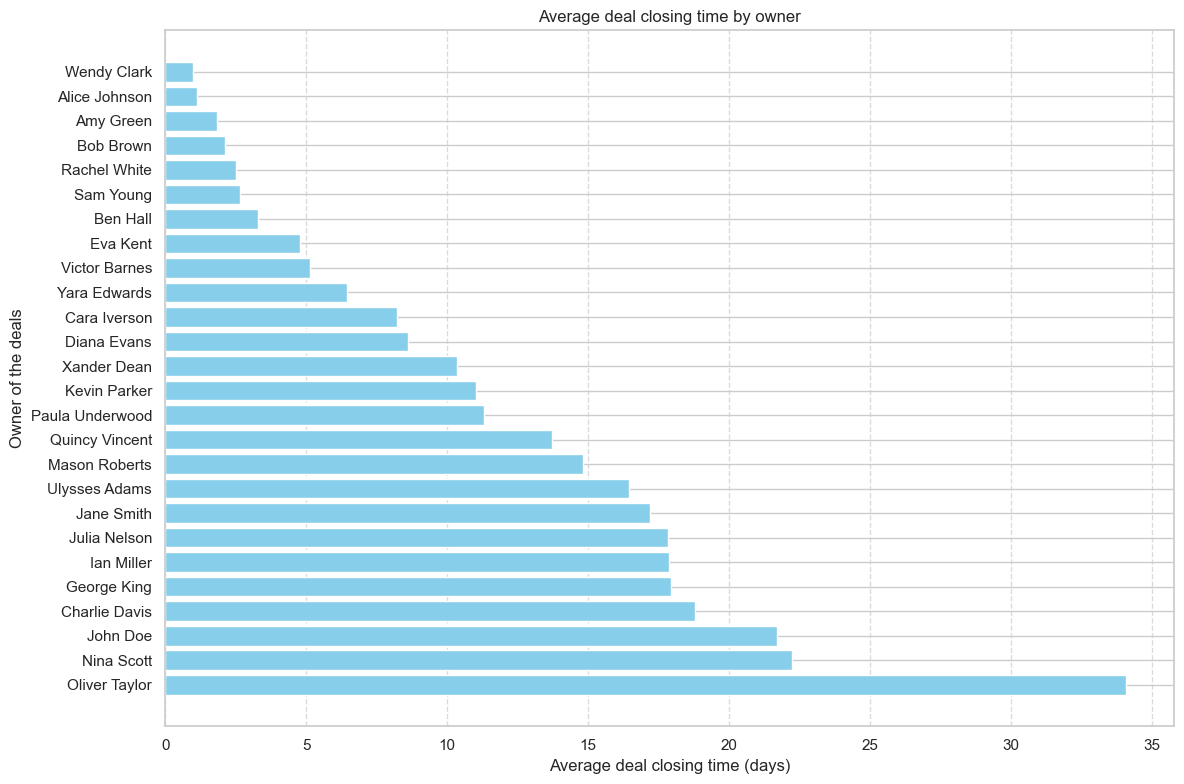

In [24]:
# visualize the Average closing time of all transactions by owners

import matplotlib.pyplot as plt

# Сортировка: от самого быстрого к самому медленному
avg_closing_time = avg_closing_time.dropna().sort_values(by='Avg Closing Time (days)', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(
    avg_closing_time['Deal Owner Name'], 
    avg_closing_time['Avg Closing Time (days)'], 
    color='skyblue'
)
plt.xlabel('Average deal closing time (days)')
plt.ylabel('Owner of the deals')
plt.title('Average deal closing time by owner')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
# Filter deals of Oliver Taylor
oliver_deals = deals_df[deals_df['Deal Owner Name'] == 'Oliver Taylor']

#Find the deal with the longest closing time
longest_deal_oliver = oliver_deals.loc[oliver_deals['Create_to_Close_Days'].idxmax()]

print(longest_deal_oliver)

Id                        5805028000008783070
Deal Owner Name                 Oliver Taylor
Closing Date              2024-06-12 00:00:00
Quality                            B - Medium
Stage                                    Lost
Lost Reason                  Changed Decision
Page                    eng/digital-marketing
Campaign                       07.07.23lal_de
SLA                           1 days 03:47:04
Content                     bloggersvideo3com
Term                                     LAL1
Source                           facebook ads
Payment Type                              NaN
Product                     Digital Marketing
Education Type                        Morning
Created Time              2023-09-24 07:19:00
Course duration                            11
Months of study                          <NA>
Initial Amount Paid                    1000.0
Offer Total Amount                    11000.0
Contact Name              5805028000004861333
City                              

In [29]:
# Exclude deals with unknown closing time
oliver_deals = oliver_deals.dropna(subset=['Create_to_Close_Days'])

# Sort in descending order
oliver_sorted = oliver_deals.sort_values(by='Create_to_Close_Days', ascending=False)

print(oliver_sorted[['Id', 'Create_to_Close_Days', 'Stage', 'Created Time', 'Closing Date', 'Offer Total Amount']].head(20).to_string(index=False))

                 Id  Create_to_Close_Days        Stage        Created Time Closing Date  Offer Total Amount
5805028000008783070                 262.0         Lost 2023-09-24 07:19:00   2024-06-12             11000.0
5805028000011973051                 246.0         Lost 2023-10-17 01:30:00   2024-06-19             11000.0
5805028000013030425                 234.0         Lost 2023-10-21 14:25:00   2024-06-11              5000.0
5805028000006448447                 221.0         Lost 2023-09-01 10:26:00   2024-04-09             11500.0
5805028000006811346                 217.0         Lost 2023-09-06 19:42:00   2024-04-10             11500.0
5805028000004984062                 214.0         Lost 2023-08-17 17:25:00   2024-03-18             11500.0
5805028000013204761                 214.0         Lost 2023-10-22 21:14:00   2024-05-23             11000.0
5805028000003669279                 203.0 Payment Done 2023-08-03 14:11:00   2024-02-22             11000.0
5805028000008975027         

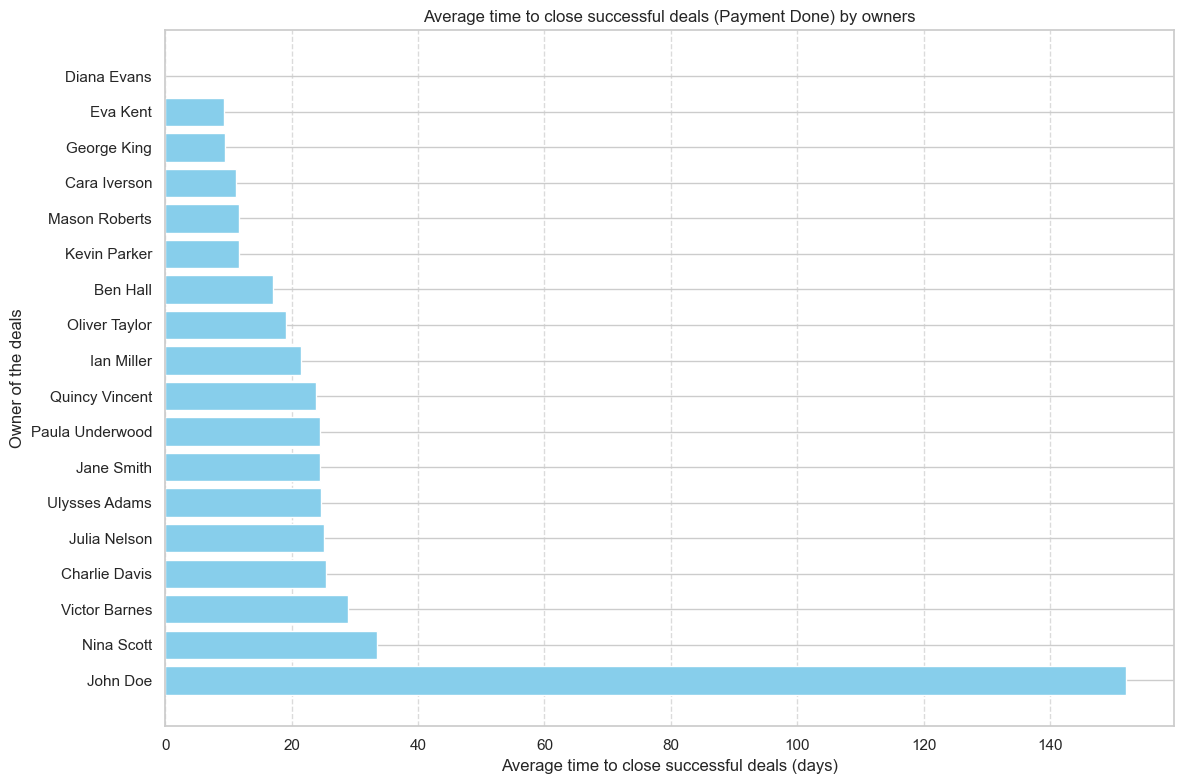

In [38]:
# # Фильтруем сделки со статусом "Payment Done"
# deals_success = deals_df[deals_df['is_success']]

# # Среднее время закрытия по владельцам для успешных сделок
# avg_closing_time_success = deals_success.groupby('Deal Owner Name', observed=False)['Create_to_Close_Days'].mean().reset_index()
# avg_closing_time_success.columns = ['Deal Owner Name', 'Avg Closing Time (days)']

# Average closing time by owner for successful deals
avg_closing_time_success = (
    deals_df[deals_df['is_success']]
    .groupby('Deal Owner Name', observed=False)['Create_to_Close_Days']
    .mean()
    .reset_index(name='Avg Closing Time (days)')
)

# Sort by time of deals
avg_closing_time_success = avg_closing_time_success.dropna().sort_values('Avg Closing Time (days)', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(
    avg_closing_time_success['Deal Owner Name'], 
    avg_closing_time_success['Avg Closing Time (days)'], 
    color='skyblue'
)
plt.xlabel('Average time to close successful deals (days)')
plt.ylabel('Owner of the deals')
plt.title('Average time to close successful deals (Payment Done) by owners')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
# Filter deals of Diana Evans
diana_successful_deals = deals_df[
    (deals_df['Deal Owner Name'] == 'Diana Evans') & 
    (deals_df['is_success'])
]
diana_sorted = diana_successful_deals.sort_values(by='Create_to_Close_Days', ascending=False)

print(diana_sorted[['Id', 'Create_to_Close_Days', 'Stage', 'Created Time', 'Closing Date', 'Offer Total Amount']].to_string(index=False))

                 Id  Create_to_Close_Days        Stage        Created Time Closing Date  Offer Total Amount
5805028000003814064                   0.0 Payment Done 2023-08-04 15:53:00   2023-08-04              3500.0


In [37]:
# Filter deals of Diana Evans
john_successful_deals = deals_df[
    (deals_df['Deal Owner Name'] == 'John Doe') & 
    (deals_df['is_success'])
]
john_sorted = john_successful_deals.sort_values(by='Create_to_Close_Days', ascending=False)

print(john_sorted[['Id', 'Create_to_Close_Days', 'Stage', 'Created Time', 'Closing Date', 'Offer Total Amount']].to_string(index=False))

                 Id  Create_to_Close_Days        Stage        Created Time Closing Date  Offer Total Amount
5805028000019345087                 152.0 Payment Done 2023-12-01 07:51:00   2024-05-01                 NaN


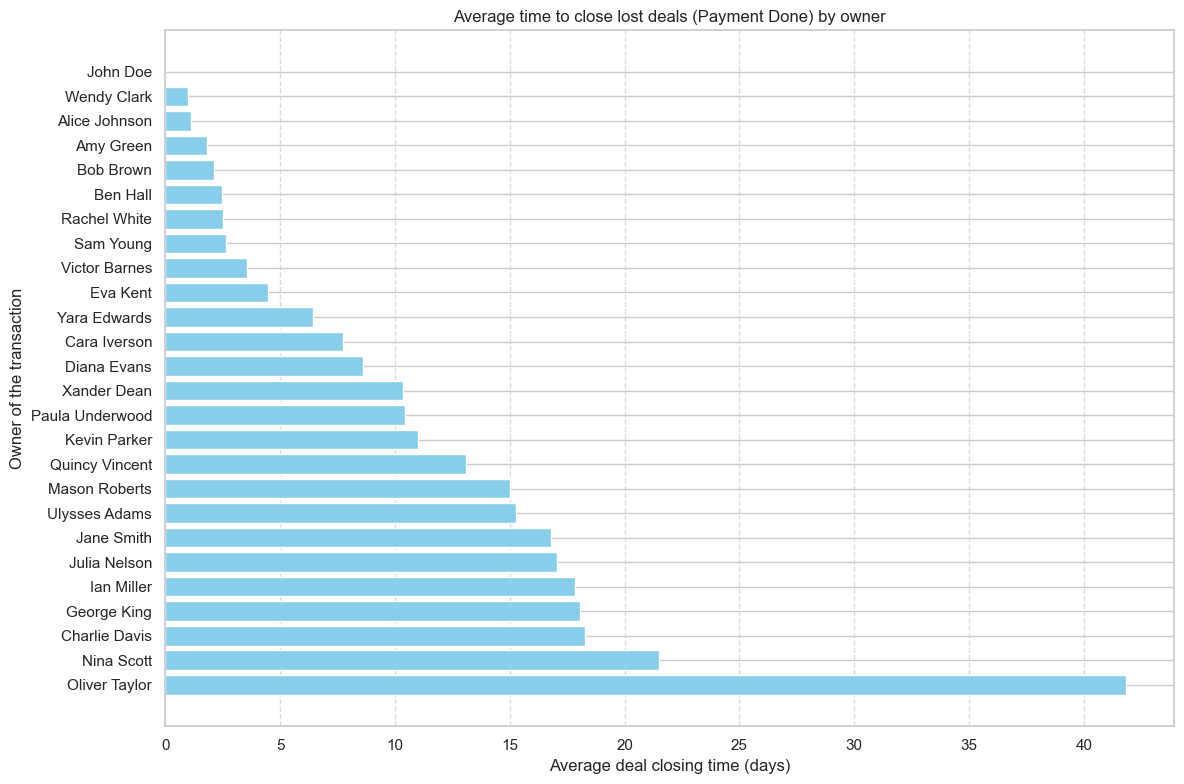

In [39]:
# Filtering deals with the status 'Lost'
lost_deals_df = deals_df[deals_df['Stage'] == 'Lost']

# Average closing time by owner for lost deals
avg_closing_time_lost = lost_deals_df.groupby('Deal Owner Name', observed=False)['Create_to_Close_Days'].mean().reset_index()
avg_closing_time_lost.columns = ['Deal Owner Name', 'Avg Closing Time (days)']

avg_closing_time_lost = avg_closing_time_lost.sort_values('Avg Closing Time (days)', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(
    avg_closing_time_lost['Deal Owner Name'], 
    avg_closing_time_lost['Avg Closing Time (days)'], 
    color='skyblue'
)
plt.xlabel('Average deal closing time (days)')
plt.ylabel('Owner of the transaction')
plt.title('Average time to close lost deals (Payment Done) by owner')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
# Filter deals of Diana Evans
john_lost_deals = deals_df[
    (deals_df['Deal Owner Name'] == 'John Doe') & 
    (deals_df['Stage'] == 'Lost')
]
john_lost_sorted = john_lost_deals.sort_values(by='Create_to_Close_Days', ascending=False)

print(john_lost_sorted[['Id', 'Create_to_Close_Days', 'Stage', 'Created Time', 'Closing Date', 'Offer Total Amount']].to_string(index=False))

                 Id  Create_to_Close_Days Stage        Created Time Closing Date  Offer Total Amount
5805028000006960031                   0.0  Lost 2023-09-07 10:05:00   2023-09-07                 NaN
5805028000004994120                   0.0  Lost 2023-08-17 20:32:00   2023-08-17                 NaN
5805028000005005105                   0.0  Lost 2023-08-17 20:23:00   2023-08-17                 NaN
5805028000004111309                   0.0  Lost 2023-08-08 16:23:00   2023-08-08                 NaN
5805028000001588071                   0.0  Lost 2023-07-13 10:01:00   2023-07-13                 NaN
5805028000004111157                   0.0  Lost 2023-08-08 14:40:00   2023-08-08              3500.0


In [42]:
# Analyze the reasons for the loss of transactions by owners

# calculate the number of each cause of loss by owner
lost_reason_counts = lost_deals_df.groupby(['Deal Owner Name', 'Lost Reason']).size().reset_index(name='Count')

pivot_lost_reason = lost_reason_counts.pivot(index='Deal Owner Name', columns='Lost Reason', values='Count').fillna(0)

print(pivot_lost_reason)

Lost Reason      Changed Decision  Conditions are not suitable  \
Deal Owner Name                                                  
Alice Johnson                   0                           10   
Amy Green                       0                            0   
Ben Hall                      147                           34   
Bob Brown                       1                            8   
Cara Iverson                   82                           12   
Charlie Davis                 337                           54   
Diana Evans                   137                           29   
Eva Kent                       20                           12   
George King                     6                            6   
Ian Miller                     42                            4   
Jane Smith                     75                           29   
John Doe                        0                            0   
Julia Nelson                  227                          107   
Kevin Park

C:\Users\user\AppData\Local\Temp\ipykernel_12776\1759518263.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lost_reason_counts = lost_deals_df.groupby(['Deal Owner Name', 'Lost Reason']).size().reset_index(name='Count')


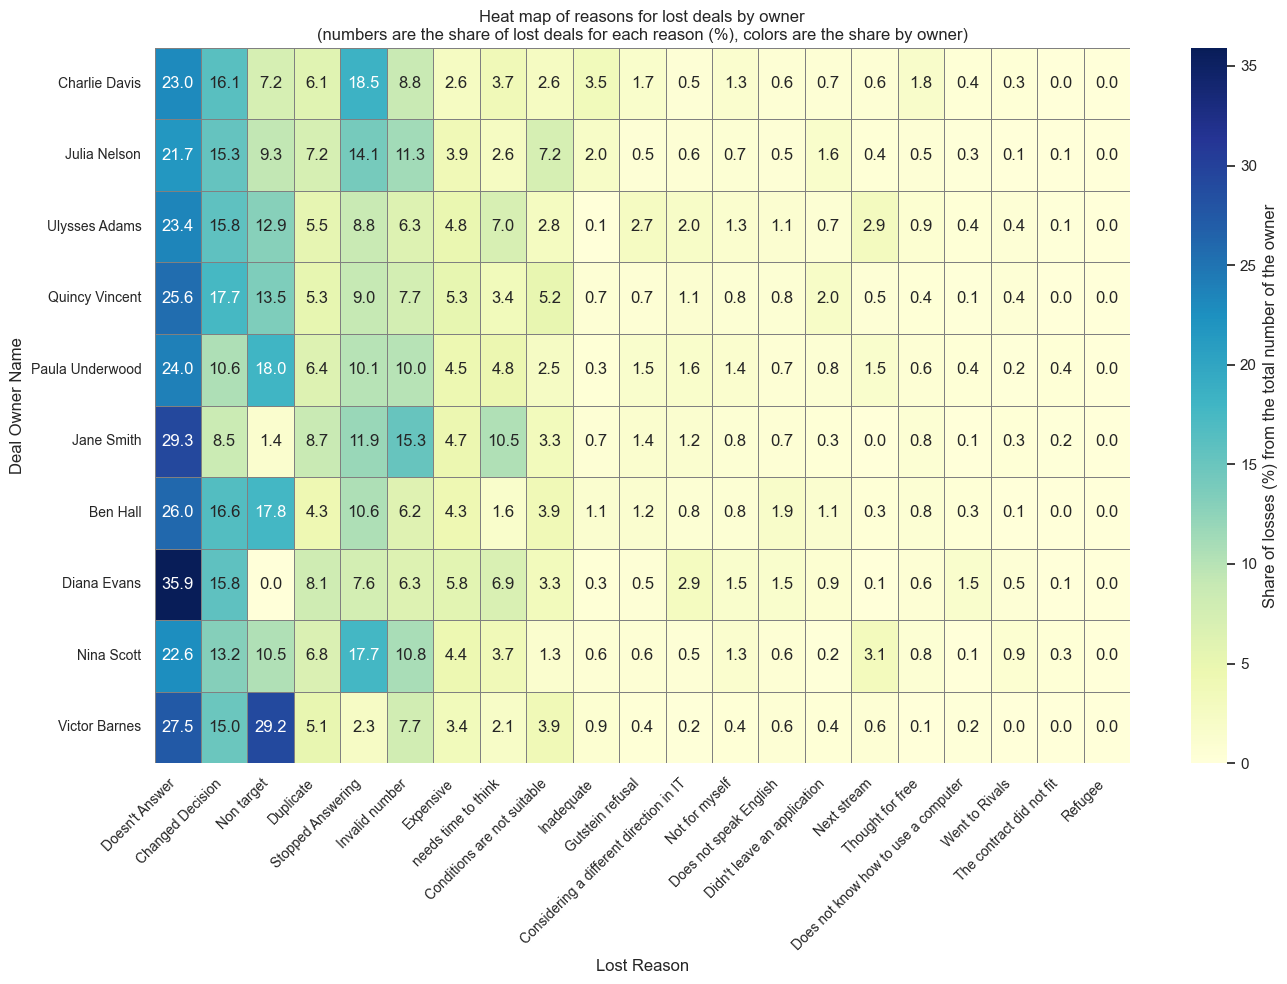

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# sort the owners and reasons for losses by total amount (for the entire table)
sorted_owners = pivot_lost_reason.sum(axis=1).sort_values(ascending=False).index
sorted_reasons = pivot_lost_reason.sum(axis=0).sort_values(ascending=False).index

pivot_sorted = pivot_lost_reason.loc[sorted_owners, sorted_reasons]

# take the top 10 owners
pivot_top10 = pivot_sorted.head(10)

# Normalize by rows for shares
pivot_norm = pivot_top10.div(pivot_top10.sum(axis=1), axis=0).fillna(0)
pivot_norm_percent = pivot_norm * 100

plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_norm_percent,
    annot=pivot_norm_percent.round(1),
    fmt='.1f',
    cmap='YlGnBu',
    cbar_kws={'label': 'Share of losses (%) from the total number of the owner'},
    linewidths=0.5,
    linecolor='gray',
)

plt.title('Heat map of reasons for lost deals by owner\n(numbers are the share of lost deals for each reason (%), colors are the share by owner)')
plt.xlabel('Lost Reason')
plt.ylabel('Deal Owner Name')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [45]:
# Analyze the quality of deals by owners

#count the number of deals of each quality by owners
quality_counts = deals_df.groupby(['Deal Owner Name', 'Quality'], observed=False).size().reset_index(name='Count')

# make a pivot table
pivot_quality = quality_counts.pivot(index='Deal Owner Name', columns='Quality', values='Count').fillna(0)

print(pivot_quality)

Quality          A - High  B - Medium  C - Low  D - Non Target  \
Deal Owner Name                                                  
Alice Johnson           0           0        0              25   
Amy Green              24           9        2               9   
Ben Hall              130         173      133             496   
Bob Brown               0           0        1              25   
Cara Iverson          108          37      142             408   
Charlie Davis         259         274      605             985   
Diana Evans            22          53      313             222   
Eva Kent               18         131       46             147   
George King             1           4       27              22   
Ian Miller             31          26       61              23   
Jane Smith             24          97      275             108   
John Doe                7           0        7               1   
Julia Nelson          194         189      591             511   
Kevin Park

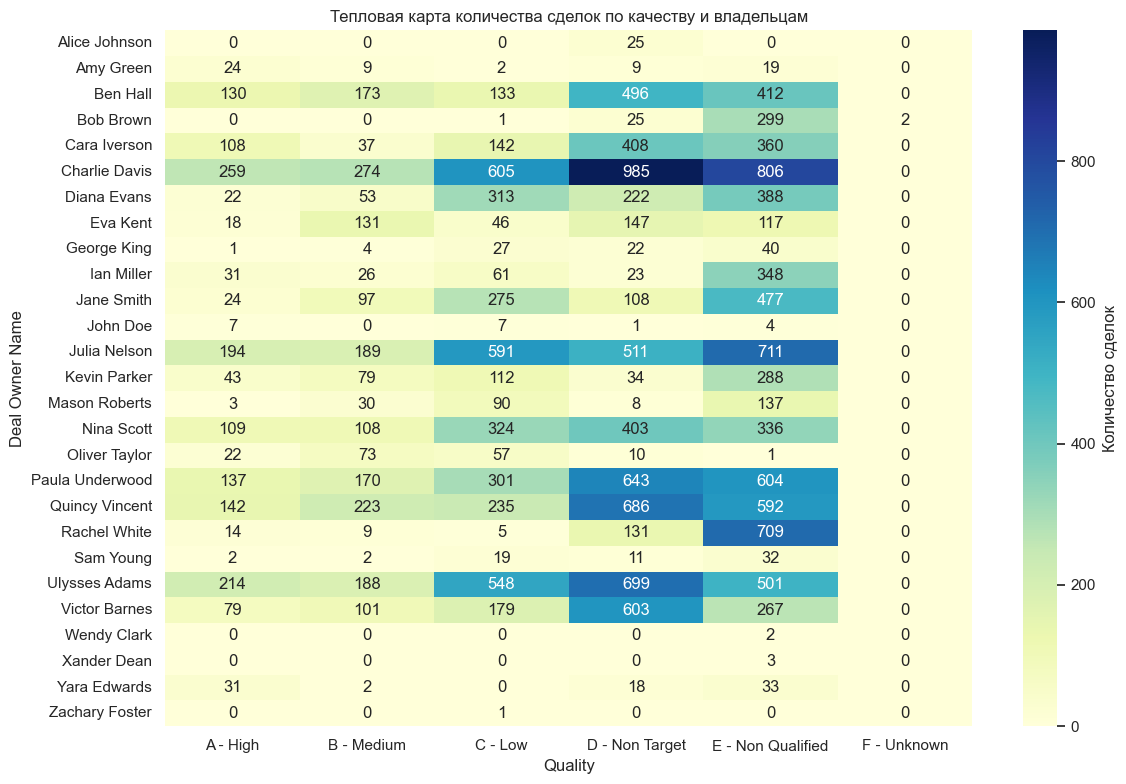

In [38]:
# Make a heat map of deal quality

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_quality, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Number of deals'})

plt.title('Heat map of number of deals by quality and owners')
plt.xlabel('Quality')
plt.ylabel('Deal Owner Name')
plt.tight_layout()
plt.show()

In [55]:
# Create a summary table by campaigns, total number of deals, number of successful deals, conversion and sales amount
campaigns_effect = deals_df.groupby('Campaign', observed=False).agg(
    total_deals=('Id', 'count'),
    success_deals=('is_success', 'sum'),
    conversion_rate=('is_success', lambda x: round(x.sum() / x.count(), 2)),
    total_paid=('Offer Total Amount', 'sum')
).reset_index().sort_values(by='total_paid', ascending=False)
campaigns_effect

,Campaign,total_deals,success_deals,conversion_rate,total_paid
113,performancemax_digitalmarkt_ru_de,2633,112,0.04,3333600.0
18,12.07.2023wide_de,1569,48,0.03,2064900.0
150,youtube_shorts_de,1624,53,0.03,2018100.0
2,02.07.23wide_de,974,52,0.05,1661100.0
76,dis_de,577,30,0.05,1228800.0
...,...,...,...,...,...
141,webanons,1,0,0.00,0.0
147,work_wr,6,0,0.00,0.0
145,women_de,1,0,0.00,0.0
144,welt_de,2,0,0.00,0.0


In [56]:
# Sort the campaigns by sales amount and take the largest 10 values
top10_campaigns_effect_paid = campaigns_effect.sort_values(by='total_paid', ascending=False).head(10)
top10_campaigns_effect_paid

,Campaign,total_deals,success_deals,conversion_rate,total_paid
113,performancemax_digitalmarkt_ru_de,2633,112,0.04,3333600.0
18,12.07.2023wide_de,1569,48,0.03,2064900.0
150,youtube_shorts_de,1624,53,0.03,2018100.0
2,02.07.23wide_de,974,52,0.05,1661100.0
76,dis_de,577,30,0.05,1228800.0
19,12.09.23interests_uxui_de,529,27,0.05,1221300.0
4,03.07.23women,612,31,0.05,1162698.0
5,04.07.23recentlymoved_de,749,31,0.04,1139100.0
8,07.07.23lal_de,541,28,0.05,1056500.0
40,24.09.23retargeting_de,479,17,0.04,980400.0


In [57]:
# Sort the campaigns by conversion and take the largest 10 values
top10_campaigns_effect_conversion = campaigns_effect.sort_values(by='conversion_rate', ascending=False).head(10)
top10_campaigns_effect_conversion

,Campaign,total_deals,success_deals,conversion_rate,total_paid
79,domain,1,1,1.00,5000.0
91,hanna,1,1,1.00,11000.0
123,referral,3,1,0.33,4000.0
137,web2311_de,10,3,0.30,16000.0
135,web1312_de,11,2,0.18,66500.0
37,2005_lost_de,6,1,0.17,33000.0
52,aussiedler_de,6,1,0.17,16000.0
73,col_de,6,1,0.17,20200.0
7,05.09.2023wide_de,6,1,0.17,15000.0
15,1006start,19,3,0.16,37000.0


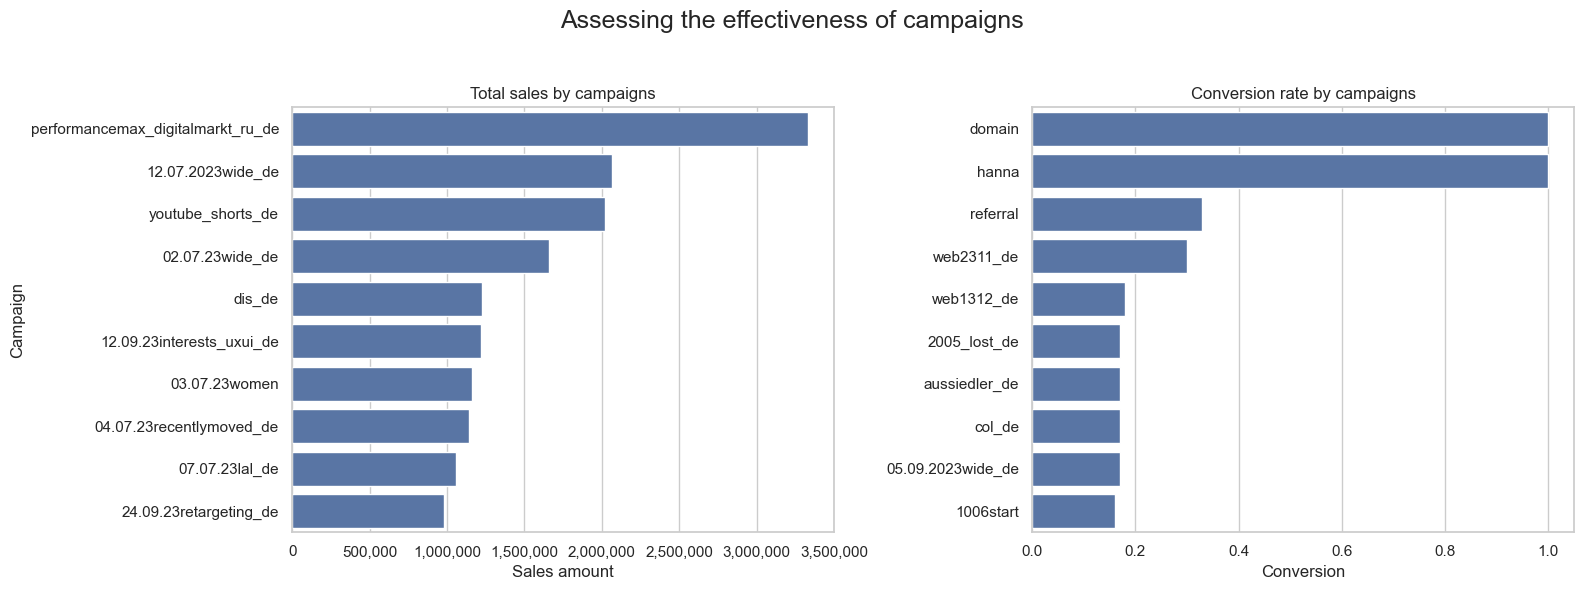

In [65]:
# Visualization of the efficiency of campaigns in terms of sales amounts and conversions
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualizations
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
fig.suptitle("Assessing the effectiveness of campaigns", fontsize=18)

# Sales total by campaigns
sns.barplot(data=top10_campaigns_effect_paid, x='total_paid', y='Campaign',
            ax=axes[0])
axes[0].set_title("Total sales by campaigns")

# Format the X-axis: add thousand separators
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

axes[0].set_xlabel("Sales amount")
axes[0].set_ylabel("Campaign")

# Conversion by campaigns
sns.barplot(data=top10_campaigns_effect_conversion, x='conversion_rate', y='Campaign',
            ax=axes[1])
axes[1].set_title("Conversion rate by campaigns")
axes[1].set_xlabel("Conversion")
axes[1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

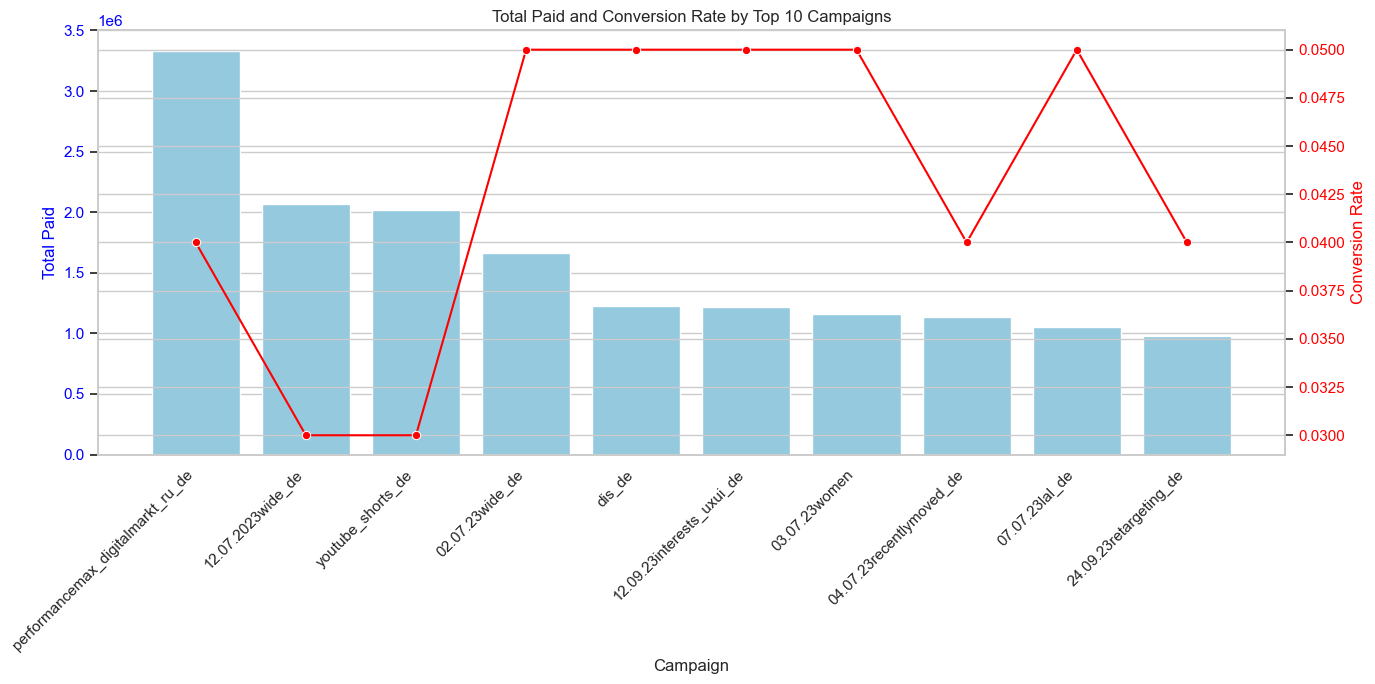

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(14, 7))

top10_campaigns_effect_paid['Campaign'] = top10_campaigns_effect_paid['Campaign'].astype(str)

# Barplot for total_paid
sns.barplot(data=top10_campaigns_effect_paid, x='Campaign', y='total_paid', ax=ax1, color='skyblue')
ax1.set_ylabel('Total Paid', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Explicitly set positions and labels for xticks
ax1.set_xticks(range(len(top10_campaigns_effect_paid)))
ax1.set_xticklabels(top10_campaigns_effect_paid['Campaign'], rotation=45, ha='right')

# Second y-axis for conversion 
ax2 = ax1.twinx()
sns.lineplot(data=top10_campaigns_effect_paid, x='Campaign', y='conversion_rate', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Conversion Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total Paid and Conversion Rate by Top 10 Campaigns')
plt.tight_layout()
plt.show()

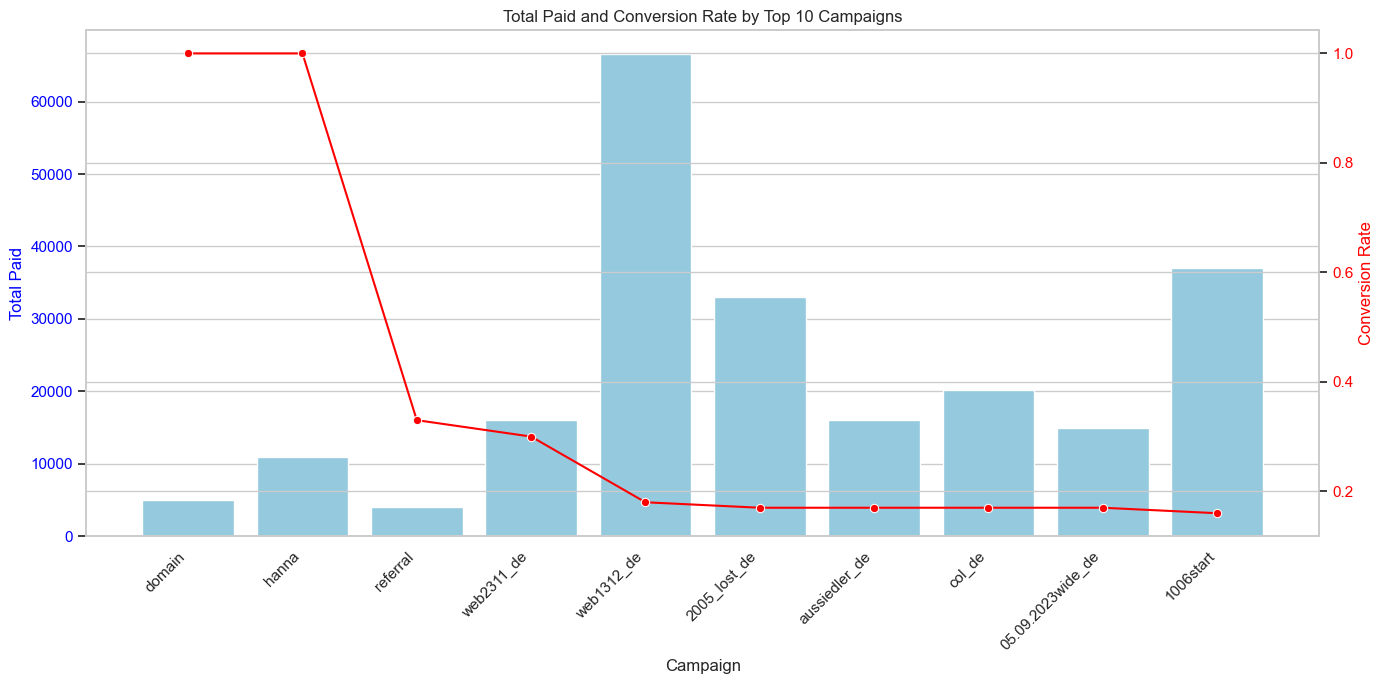

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(14, 7))

top10_campaigns_effect_conversion['Campaign'] = top10_campaigns_effect_conversion['Campaign'].astype(str)

# Barplot for total_paid
sns.barplot(data=top10_campaigns_effect_conversion, x='Campaign', y='total_paid', ax=ax1, color='skyblue')
ax1.set_ylabel('Total Paid', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Explicitly set positions and labels for xticks
ax1.set_xticks(range(len(top10_campaigns_effect_conversion)))
ax1.set_xticklabels(top10_campaigns_effect_conversion['Campaign'], rotation=45, ha='right')

# Second y-axis for conversion
ax2 = ax1.twinx()
sns.lineplot(data=top10_campaigns_effect_conversion, x='Campaign', y='conversion_rate', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Conversion Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total Paid and Conversion Rate by Top 10 Campaigns')
plt.tight_layout()
plt.show()